# Visualization Tools

We have included several visualizations that we have found useful through our development and use of the package. In this demo we will go through how to extend some of the ones we have already used through the webinar so that they can be adapted for more applications. It's worth noting that all of our plots are [matplotlib](https://matplotlib.org/)-compliant, so making changes or updates to the figures even after they are generated should be possible and easy.

In [1]:
# Fix PROJ path ---------------------------------------------------------------
import os; 
os.environ['PROJ_LIB']=r'/opt/conda/pkgs/proj-9.2.1-ha5fc9e9_0/share/proj'
# Load libraries --------------------------------------------------------------
import pandas as pd
from os import path
import MGSurvE as srv
import matplotlib.pyplot as plt
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('visualization', './out/')
srv.makeFolder(OUT_PTH)

## Plotting Trap Attractiveness Kernels

For now, plotting our traps attractiveness kernels involves generating a landscape and calling the `srv.plotTrapsKernels` method. Let's define three different traps:

In [2]:
# Defining a dummy landscape --------------------------------------------------
pts = pd.DataFrame({'x': [0, 1], 'y': [0, 1], 't': [0, 0]})
points = pd.DataFrame(pts, columns=('x', 'y', 't'))
# Traps info ------------------------------------------------------------------
nullPos = [0, 0, 0]
traps = pd.DataFrame({'x': nullPos, 'y': nullPos, 't': nullPos, 'f': nullPos})
tKer = {
    0: {
        'kernel': srv.exponentialAttractiveness,
        'params': {'A': 1, 'k': .01, 's': .3, 'gamma': .975, 'epsilon': 0}
    },
    1: {
        'kernel': srv.exponentialDecay, 
        'params': {'A': 0.5, 'b': 0.045}
    },
    2: {
        'kernel': srv.sigmoidDecay,     
        'params': {'A': 1, 'rate': .175, 'x0': 25}
    }
}
TCOL = {
    0: '#f7258515', 1: '#fe5f5515', 2: '#5ddeb125', 
    3: '#f038ff15', 4: '#e2ef7015', 5: '#9381ff15', 
}

And plot their profiles. Note that we are adding axis labels and changing the font sizes as we would do with any [matplotlib](https://matplotlib.org/) figure:

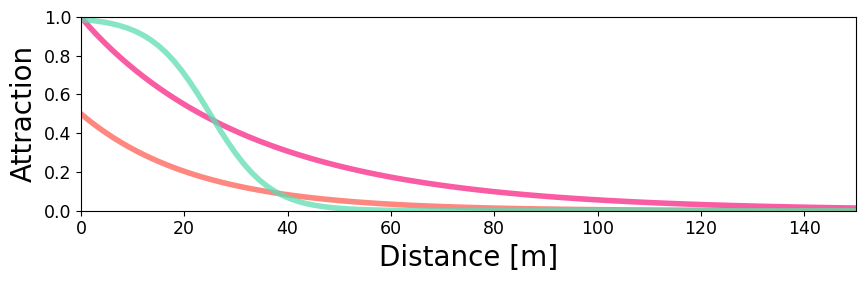

In [3]:
lnd = srv.Landscape(points, traps=traps, trapsKernels=tKer)
(fig, ax) = plt.subplots(1, 1, figsize=(10, 10), sharey=False)
(fig, ax) = srv.plotTrapsKernels(
    fig, ax, lnd, 
    colors=TCOL, distRange=(0, 150), aspect=.25
)
ax.set_xlabel('Distance [m]', fontsize=20)
ax.set_ylabel('Attraction', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12.5)
fig.savefig(
    path.join(OUT_PTH, 'TrapKernels.png'), 
    facecolor='w', bbox_inches='tight', pad_inches=0.1, dpi=300
)

## Plotting Euclidean Landscapes

## Plotting in a Globe